I have covered a very simple approach in my previous Notebook where I simply changed the categorical variables into numeric with using only the number of category levels and made 1 more alteration on the output to make it symmetric:
[Just an easy solution][1]

In this solution I will try to do a better job on categorical variables. This can be really important as the XGBoost (which I will use again) does splits based on relational operators: in each step it splits the dataset to "<" and ">=" of a given value. If the target variable is totally independent from the value of the feature then the internal decision tree might not find the relevant rules easily and will go towards the goal in small steps by just selecting the tails of the feature. So let's help the decision tree and give it meaningful inputs!


  [1]: https://www.kaggle.com/guyko81/allstate-claims-severity/just-an-easy-solution

The first part will be the same as in [Just an easy solution][1].

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost as xgb # XGBoost implementation

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

# read data
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

features = [x for x in train.columns if x not in ['id','loss']]
#print(features)

cat_features = [x for x in train.select_dtypes(include=['object']).columns if x not in ['id','loss']]
num_features = [x for x in train.select_dtypes(exclude=['object']).columns if x not in ['id','loss']]
print(cat_features)
print(num_features)

train['log_loss'] = np.log(train['loss'])

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


sample_submission.csv
test.csv
train.csv

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat1

I'm going to use the average value of the target (log_loss in our case) for each category. Let's see how it changes the 'cat1' variable:

In [2]:
train_x = train[features]
a = pd.DataFrame(train['log_loss'].groupby([train['cat1']]).mean())
a['cat1'] = a.index
train_x['cat1'] = pd.merge(left=train_x, right=a, how='left', on='cat1')['log_loss']
train_x.head(n=20)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,7.808979,B,A,B,A,A,A,A,B,A,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,7.808979,B,A,A,A,A,A,A,B,B,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,7.808979,B,A,A,B,A,A,A,B,B,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,7.310839,B,A,B,A,A,A,A,B,A,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,7.808979,B,A,B,A,A,A,A,B,B,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606
5,7.808979,B,A,A,A,A,A,A,B,A,...,0.302678,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792
6,7.808979,A,A,A,B,A,A,A,A,A,...,0.295397,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931
7,7.808979,B,A,B,A,A,A,A,B,A,...,0.473767,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416
8,7.808979,B,B,B,B,A,A,A,B,B,...,0.281143,0.628534,0.384099,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191
9,7.808979,B,A,A,B,B,A,A,B,A,...,0.310061,0.713343,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523


Nice, just perfect! Hopefully it will help and worth the work. 
Let's do it for all of the variables! 
(don't forget the test dataset)

In [3]:
train_x = train[features]
test_x = test[features]
for c in range(len(cat_features)):
    a = pd.DataFrame(train['log_loss'].groupby([train[cat_features[c]]]).mean())
    a[cat_features[c]] = a.index
    train_x[cat_features[c]] = pd.merge(left=train_x, right=a, how='left', on=cat_features[c])['log_loss']
    test_x[cat_features[c]] = pd.merge(left=test_x, right=a, how='left', on=cat_features[c])['log_loss']

train_x.head(n=20)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,7.808979,7.929624,7.647256,7.832602,7.608976,7.774372,7.658894,7.666251,7.934159,7.583702,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,7.808979,7.929624,7.647256,7.616506,7.608976,7.774372,7.658894,7.666251,7.934159,8.264243,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,7.808979,7.929624,7.647256,7.616506,7.831443,7.774372,7.658894,7.666251,7.934159,8.264243,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,7.310839,7.929624,7.647256,7.832602,7.608976,7.774372,7.658894,7.666251,7.934159,7.583702,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,7.808979,7.929624,7.647256,7.832602,7.608976,7.774372,7.658894,7.666251,7.934159,8.264243,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606
5,7.808979,7.929624,7.647256,7.616506,7.608976,7.774372,7.658894,7.666251,7.934159,7.583702,...,0.302678,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792
6,7.808979,7.498437,7.647256,7.616506,7.831443,7.774372,7.658894,7.666251,7.519821,7.583702,...,0.295397,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931
7,7.808979,7.929624,7.647256,7.832602,7.608976,7.774372,7.658894,7.666251,7.934159,7.583702,...,0.473767,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416
8,7.808979,7.929624,8.340551,7.832602,7.831443,7.774372,7.658894,7.666251,7.934159,8.264243,...,0.281143,0.628534,0.384099,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191
9,7.808979,7.929624,7.647256,7.616506,7.831443,7.478039,7.658894,7.666251,7.934159,7.583702,...,0.310061,0.713343,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523


Come XGBoost, do it for us :)

In [4]:
xgdmat = xgb.DMatrix(train_x, train['log_loss']) # Create our DMatrix to make XGBoost more efficient

params = {'eta': 0.01, 'seed':0, 'subsample': 0.5, 'colsample_bytree': 0.5, 
             'objective': 'reg:linear', 'max_depth':6, 'min_child_weight':3} 

num_rounds = 1000
bst = xgb.train(params, xgdmat, num_boost_round = num_rounds)

And the feature importance. Will it differ from the previous?

,feature,fscore
0,cat62,0.000018
1,cat69,0.000037
2,cat35,0.000074
3,cat34,0.000092
4,cat55,0.000092
5,cat68,0.000111
6,cat58,0.000129
7,cat47,0.000129
8,cat48,0.000148
9,cat60,0.000166


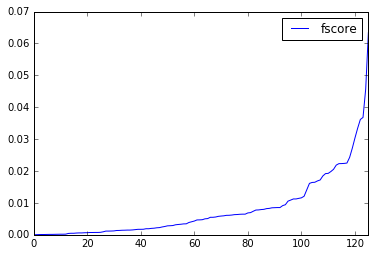

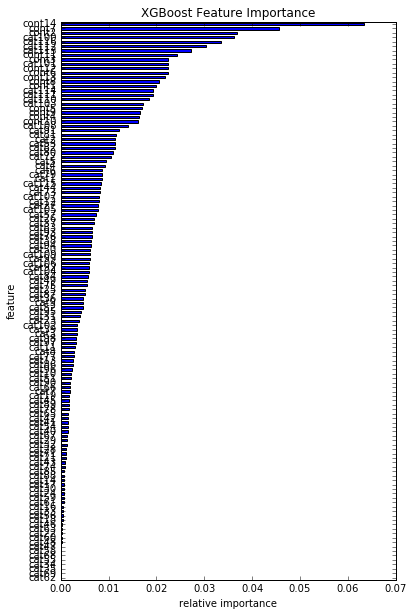

In [5]:
import matplotlib.pyplot as plt
import operator

def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1

    outfile.close()
    
ceate_feature_map(features)

importance = bst.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

df

It definitely differs. Seems like more categorical variables reached the top 10 in the importance list: 5 vs 2 in previous model.

Ok, model prediction again.

In [6]:
test_xgb = xgb.DMatrix(test_x)
submission = pd.read_csv("../input/sample_submission.csv")
submission.iloc[:, 1] = np.exp(bst.predict(test_xgb))
submission.to_csv('xgb_starter.cat_mean.csv', index=None)

Hmm, the result is better but not that much: 1138.56

I guess that 1000 trees can solve the issue of not having ordered inputs. But at least we made some progression. 